In [1]:
# use if autocompletion is not working
%config Completer.use_jedi = False

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import pandas as pd
from tqdm import tqdm

import numpy as np
import re
from copy import deepcopy
from typing import List, Tuple, Dict
from collections import OrderedDict
from nltk import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt

In [4]:
from modern_slavery_registry import get_root_path
from modern_slavery_registry.modern_slavery_statement_parser import clean_text, clean_corpus
from modern_slavery_registry import text_parser

In [5]:
PROJECT_PATH = get_root_path()
DATA_PATH = os.path.join(PROJECT_PATH, "data")
SHEETS_PATH = os.path.join(PROJECT_PATH, "data", "sheets")

In [6]:
np.sort(os.listdir(SHEETS_PATH))

array(['.ipynb_checkpoints', 'Continents_to_CountryNames.csv',
       'CountryCodes_to_CountryNames.csv',
       'combined_modern_slavery_statements.xlsx', 'ext_shawn_creds.csv',
       'fuzzy_matches.xlsx', 'modern_slavery_dataset.csv',
       'modern_slavery_dataset_nitin.xlsx', 'subset_data.xlsx',
       'subset_data_v2.xlsx', 'subset_data_v3.xlsx',
       'subset_data_v4.xlsx', 'subset_data_v5.xlsx',
       'subset_data_v6.xlsx', 'subset_data_v7.xlsx'], dtype='<U39')

## Mapping continents to country codes

In [7]:
df = pd.read_excel(os.path.join(SHEETS_PATH, "subset_data_v7.xlsx"))

In [8]:
df[[col for col in df.columns if "statement" in col]].isna().sum(axis=0)

statement               0
statement_cleaned       0
statement_cleaned_v2    4
dtype: int64

In [9]:
df.fillna("#NA", inplace=True)

In [10]:
# %%time
# cleaned_corpus = clean_corpus(corpus=df["statement"].values)

# cleaned_corpus_as_list = []
# for i in range(len(cleaned_corpus)):
#     cleaned_corpus_as_list.append(deepcopy(cleaned_corpus[i]))
    
# del cleaned_corpus

In [11]:
freqs = text_parser.compute_ngram_freqs(
    corpus=df["statement_cleaned_v2"].values, 
    n=2, 
    verbose=True)

In [32]:
def process_freqs(freqs: Dict[Tuple[str], int]) -> Dict[str, int]:
    
    new_freqs = OrderedDict()
    for k, v in freqs.items():
        k = re.sub(r"[.,:;?]+", "", " ".join(k))
        k = " ".join(k.split())
        if len(k) > 0: 
            new_freqs[k] = v 
    
    new_freqs = {k:v for k,v in sorted(new_freqs.items(), key=lambda x: x[1], reverse=True)}
    
    return new_freqs

In [34]:
processed_freqs = process_freqs(freqs)

In [36]:
wd = WordCloud(width=1200, height=600)

In [38]:
wd.generate_from_frequencies(frequencies=processed_freqs)

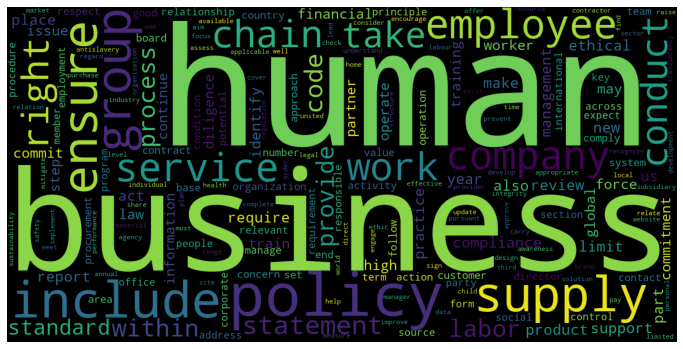

In [39]:
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(wd)
ax.set_axis_off()
plt.show()